# Convert CIFAR10 data to pngs

To show overhead of loading individual files. This is intended to be used (and should be run before) the `PyTorch_profiling.ipynb` notebook.

In [1]:
import os
import pickle
import glob

import numpy as np
from PIL import Image
from torchvision import datasets

import matplotlib.pyplot as plt
%matplotlib inline

Create path to where pngs should be stored

In [2]:
DATA_PATH = os.getenv('TEACHER_DIR', os.getcwd()) + '/JHS_data'

png_path=os.path.join(DATA_PATH,'cifar10_png')
if not os.path.exists(png_path):
    os.makedirs(png_path)

print(f"Path to store cifar10 data: {DATA_PATH}")
print(f"Path to store pngs: {png_path}")

Path to store cifar10 data: /projects/jhssrf014/JHS_data
Path to store pngs: /projects/jhssrf014/JHS_data/cifar10_png


Make sure Cifar10 data is present in the DATA_PATH

In [3]:
datasets.CIFAR10(DATA_PATH, train=False,  download=True),

Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 10000
     Root location: /projects/jhssrf014/JHS_data
     Split: Test,)

Unpickle all cifar10 batches.

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_dict1 = unpickle(os.path.join(DATA_PATH,'cifar-10-batches-py/data_batch_1'))
batch_dict2 = unpickle(os.path.join(DATA_PATH,'cifar-10-batches-py/data_batch_2'))
batch_dict3 = unpickle(os.path.join(DATA_PATH,'cifar-10-batches-py/data_batch_3'))
batch_dict4 = unpickle(os.path.join(DATA_PATH,'cifar-10-batches-py/data_batch_4'))
batch_dict5 = unpickle(os.path.join(DATA_PATH,'cifar-10-batches-py/data_batch_5'))

Check the content of these unpickled dictionaries

In [5]:
print(f"Number of items in one batch_dict: {len(batch_dict1[b'data'])}")
print(f"Keys: {batch_dict1.keys()}")
print(f"Dimension of raw image: {batch_dict1[b'data'][0].shape}")

Number of items in one batch_dict: 10000
Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Dimension of raw image: (3072,)


We need to reshape the image, as it is now a flat array:

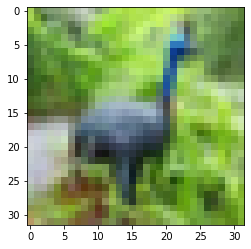

In [6]:
def convert_image(img):
    img = np.reshape(img,(3,32,32))
    img = np.moveaxis(img,0,2)
    return img

plt.imshow(convert_image(batch_dict1[b'data'][6]))

Define function that will loop over all images in a batch_dict, convert the shame, and store it as a png

In [7]:
def reshape_and_save(batch_dict):
    for img, filename in zip(batch_dict[b'data'],batch_dict[b'filenames']):
        img = convert_image(img)
        im = Image.fromarray(img)
        filename=os.path.join(png_path, str(filename,'utf-8'))
        print(f"Saving file: {filename}")
        im.save(f'{filename}')

Run the `reshape_and_save` function on each batch dict

In [8]:
reshape_and_save(batch_dict1)
reshape_and_save(batch_dict2)
reshape_and_save(batch_dict3)
reshape_and_save(batch_dict4)
reshape_and_save(batch_dict5)

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leptodactylus_pentadactylus_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_000148.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_001250.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001521.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000293.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001735.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001300.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cow_pony_s_001168.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_001584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001355.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_001000.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001354.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_hor

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000229.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_001349.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_001280.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_002104.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001360.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tugboat_s_000715.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000360.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002337.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_001422.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001304.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_000114.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anuran_s_000550.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000382.png

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/packet_boat_s_001206.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001564.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_001658.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001035.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stag_s_002583.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000629.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_001242.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_001830.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_000721.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_001119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_002317.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_0

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001294.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_000701.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_s_000964.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000807.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barge_s_000426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000255.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000059.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000222.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_000377.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/scow_s_000687.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_001571.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001625.png
Saving file: /projects/j

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_000550.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000292.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001853.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_001963.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/palfrey_s_000300.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002298.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000188.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000471.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001598.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_000638.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000091.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000744.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002552.png
Saving file: /projects

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002216.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_000888.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_001809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000784.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_speciosus_s_000070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000470.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cabin_cruiser_s_000299.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001897.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000478.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/transporter_s_001251.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_001731.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_000614.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/am

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002113.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001068.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_000375.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001976.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000073.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_000096.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000229.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_001012.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_000968.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_002134.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_001144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/river_boat_s_000465.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002387.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_002671.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001974.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_000774.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001154.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001672.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_002402.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_001140.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002051.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_000136.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000086.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_000912.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000664.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_002397.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ambulance_s_001538.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_saddle_horse_s_000192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_002142.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_000353.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_000030.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_002290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/multiengine_airplane_s_000211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000679.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_002480.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_001261.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_frog_s_000136.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/musk_deer_s_000061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_001691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000213.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribou_s_000552.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/female_horse_s_001364.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_000242.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bookmobile_s_000995.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_000542.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000174.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_001065.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_of_passage_s_000477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_001984.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/racing_boat_s_000002.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_002035.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000929.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000860.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000911.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_000436.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_001867.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000293.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000520.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000416.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_002028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_000922.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001383.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001612.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000117.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_001344.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_001250.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000106.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/meadow_pipit_s_000362.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000497.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_001323.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bu

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_001150.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001778.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_001389.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_002159.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001239.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_000012.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_002220.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_001688.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_002316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000921.png
Saving file: /projects/jhssrf014/JHS_data/cifar1

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001624.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tank_ship_s_000191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/grass_frog_s_000514.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_000072.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000235.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001495.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_001065.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001834.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000458.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_001231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000688.png
Saving file: /pro

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_002058.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_boreas_s_000145.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001673.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_000052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000135.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_001233.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_001140.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001107.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000447.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000978.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_deer_s_000087.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cavalry_horse_s_0

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/brocket_s_000024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_002320.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000902.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_002845.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000184.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000656.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dredger_s_000071.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001478.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001194.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeian

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_002137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_001619.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_001171.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_001950.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000017.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001252.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000304.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000741.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001125.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000065.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_002174.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_000224.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001644.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_001977.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_001556.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000183.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_001739.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000881.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000274.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/natterjack_s_000113.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001075.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001433.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_001361.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_000114.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001018.pn

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000627.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001372.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000029.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001777.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_000624.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000743.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bookmobile_s_000740.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_002000.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pic

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000582.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_000226.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_001472.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/female_horse_s_001457.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_000913.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000469.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tugboat_s_000924.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_001558.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001162.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000646.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_tr

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_000391.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000993.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_002273.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_001300.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_000074.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000832.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001417.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_002160.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000105.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/male_horse_s_000057.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_001452.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001058.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001928.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001454.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001603.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000239.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cavalry_horse_s_000935.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000224.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001457.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001748.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_001639.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000606.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000920.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_pn

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_000770.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000759.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/multiengine_plane_s_000170.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_001603.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_cascadae_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_002079.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_002410.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_000173.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000148.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/multiengine_airplane_s_000247.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001166.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/southwestern_toad_s_000090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000819.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_001441.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_000751.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001651.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001503.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001329.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001115.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002643.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001461.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_002158.png
Saving file: /projects/jhssrf014/JHS_data/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001109.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001520.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000200.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/feist_s_000361.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_002237.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_000095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000152.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000093.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_calamita_s_000677.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001201.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_001937.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_00014

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001988.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000818.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001511.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/beach_wagon_s_000967.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/crapaud_s_001330.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000917.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_001518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000576.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airplane_s_000003.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001034.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_00000

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000393.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_000888.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000297.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mare_s_000070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000935.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_of_passage_s_000183.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/houseboat_s_000131.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_000239.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/seaplane_s_000551.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000442.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_000072.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000462.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_hors

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000015.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_001080.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000114.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000458.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001306.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000184.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001202.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_002212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_001595.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001212.png
Saving fi

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000727.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000260.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_000022.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_001275.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001727.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/feist_s_000686.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_000067.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001027.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/male_horse_s_000352.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_000512.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000504.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000597.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000003.png
Saving fi

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001455.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000339.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_001964.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000651.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000456.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001673.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_001495.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_002095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000732.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001358.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_000532.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motor

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_craft_s_000617.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001344.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001274.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_001241.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_002291.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_002236.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_002427.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001675.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000363.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000031.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000592.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/h

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001121.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000377.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_000231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000156.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_000742.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_001855.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000628.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_001033.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/southwestern_toad_s_000302.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_001678.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000789.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tr

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000908.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000205.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorboat_s_000072.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001901.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000053.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_000041.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000838.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000969.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000107.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000717.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_000052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airplane_s_000142.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_001357.png
S

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog_s_000326.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_000326.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000541.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_000660.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000185.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_001636.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001173.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/river_boat_s_000663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sound_truck_s_001518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001287.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_tarandus_s_000512.png
Saving file: /projects/jhssrf014/JHS_data/cifar1

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001017.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rowboat_s_000195.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_000407.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000555.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000596.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribou_s_000934.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_001323.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000281.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001213.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_000552.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_002328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000576.png
Saving file: 

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_002575.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000849.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_s_002641.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000411.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_000787.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_001106.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_000864.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000203.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000435.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000091.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_001683.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/seaplane_s_001958.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/crapaud_s_000050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000939.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_002052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/crapaud_s_000866.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_000083.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000652.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000051.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000709.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002703.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaeh

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000017.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000552.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_novaehollandiae_s_000376.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000765.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_002021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002582.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_001408.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_001292.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alytes_obstetricans_s_000331.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_002306.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_001139.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001924.png
Saving file: /projects/jhssrf014/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000778.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000396.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/reconnaissance_plane_s_000827.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000255.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_000346.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000286.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_001938.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_001419.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_000216.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001538.png
Saving file: /projects/jhssrf014/JHS_data

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_001350.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001458.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002597.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_001010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000188.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_van_s_000090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000960.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000911.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000905.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001096.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_000636.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001911.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_002301.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_001039.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001264.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_002448.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000885.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000843.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_000348.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000015.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_001600.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001325.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ameri

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_002281.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_novaehollandiae_s_000248.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_000606.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000603.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moving_van_s_002137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002039.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000386.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_001606.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000504.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_000158.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001613.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001307.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_000465.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_000507.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_002295.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000019.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000488.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_001006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000725.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001643.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cavalry_horse_s_001786.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_000222.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001098.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/racing_boat_s_000769.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001145.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_boreas_s_000518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_001423.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000985.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_000240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001118.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002391.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_000471.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000440.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_001826.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_001938.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001686.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_002705.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000989.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001386.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001611.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_001264.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_001612.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_002054.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001271.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001161.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000180.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000176.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000291.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000604.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000880.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000859.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001489.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_000850.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001369.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_americana_s_000283.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tandem_trailer_s_001697.png
Saving file: /projects/jhssrf014/J

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001220.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_001848.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001545.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leptodactylus_pentadactylus_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001002.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000931.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000615.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tip_truck_s_000141.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001848.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000117.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lifeboat_s_000118.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001299.png
Saving file: /projects/jhssrf014/JHS_data/cifar10

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001434.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/male_horse_s_000791.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000560.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001182.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_001019.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/liberty_ship_s_000217.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001312.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_000260.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/midwife_toad_s_000261.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_000718.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000452.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000363.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000544.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tailed_toad_s_000035.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000800.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000308.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000043.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000260.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001569.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001317.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_001442.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002205.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_001819.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cont

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_002028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000229.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000758.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_000902.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000644.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_000549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000920.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_002194.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_002064.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_002601.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001530.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_000614.png
Saving file: /projects/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001743.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_002007.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001131.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001653.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000959.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000545.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alley_cat_s_002602.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_000637.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_000349.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000952.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000359.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/seaplane_s_000154.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_002070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000308.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/abandoned_ship_s_000852.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000683.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_s_000618.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_002258.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000020.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001253.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001012.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000834.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000493.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_002576.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000535.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000908.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001411.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001430.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001104.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001410.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000257.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000590.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spadefoot_s_000927.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_000961.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000657.png
Sav

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000152.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wapiti_s_000079.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_000163.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_001935.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_002059.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002282.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001016.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_000204.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_002574.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_000816.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001641.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_0009

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/feist_s_000365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002791.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_002071.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000103.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cock_s_000353.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wapiti_s_001332.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tip_truck_s_000998.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000689.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_001493.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000881.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000835.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001767.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000353.pn

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001244.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_unicolor_s_000183.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_002000.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/female_horse_s_000659.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leptodactylus_pentadactylus_s_000137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000420.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000539.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_002737.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_001646.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000233.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_001028.png
Saving file: /projects/jhssrf014/JHS_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/musk_deer_s_000372.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001215.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001819.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001423.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_000843.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000263.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000501.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_002104.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alley_cat_s_002336.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001701.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001039.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_001172.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_000467.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000563.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000628.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000695.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_000516.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001908.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000082.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_001837.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000857.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001605.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dredger_s_001292.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_000580.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_001626.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_002005.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_001778.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_001614.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000160.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000812.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_tarandus_s_001220.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_001609.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001489.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_002123.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000450.png
Sav

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dawn_horse_s_000667.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000076.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mackinaw_boat_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog_s_001375.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_001054.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorboat_s_002135.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000233.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dustcart_s_000002.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_palustris_s_000316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001136.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_001045.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_001793.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000898.png
Savin

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tailed_frog_s_000050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000131.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/texas_toad_s_000538.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_001554.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorboat_s_000679.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001367.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001033.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alley_cat_s_000547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/grass_frog_s_000033.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002003.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_000037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_00084

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000153.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001868.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_001689.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001598.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alytes_obstetricans_s_000074.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000531.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000280.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_001016.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_000639.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000282.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000087.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_pn

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_000083.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flightless_bird_s_000565.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_001869.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_001468.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_001501.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000395.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001728.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000685.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001921.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_001176.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_001069.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000365

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000637.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/texas_toad_s_000879.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001823.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002759.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/minesweeper_s_000294.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000494.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ambulance_s_002698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/norfolk_wherry_s_000336.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_001422.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000726.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/banana_boat_s_000676.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_sika_s_000305.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_001192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000679.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moving_van_s_000297.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_001383.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/transporter_s_001235.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_001212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000535.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000258.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_001151.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000952.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_s_000509.png
Saving 

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_000399.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_003025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001585.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_001052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_000364.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_002240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_001135.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_americana_s_000074.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001431.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_001784.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wapiti_s_001370.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001449.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000413.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_000243.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_001267.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_001419.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001087.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_001164.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000800.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001658.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_001086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_000164.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000396.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airplane_s_000009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_000112.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_000915.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000033.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/european_elk_s_000042.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001972.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000183.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_001991.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dustcart_s_000114.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_002435.png
Savi

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/iceboat_s_001305.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000624.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001413.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_000719.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000014.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_001976.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000952.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001589.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000833.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000243.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001057.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000733.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_000778.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000749.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000531.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000982.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_001463.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/meadow_pipit_s_000075.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_000430.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001172.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_000212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruis

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_002705.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_000466.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000579.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/songbird_s_000654.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001277.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_002739.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001627.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001982.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000018.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001217.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001416.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000132.png
Saving file: /projects/jhssrf

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_001477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001153.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000176.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_001425.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog_s_000106.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001767.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000567.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_toad_s_000006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_transporter_s_000210.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/english_toy_spaniel_s_001036.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001875.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_001445.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/d

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_001262.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000495.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000269.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_001243.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_000759.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/multiengine_airplane_s_000287.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_001109.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001043.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tug_s_000214.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000739.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001258.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuah

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/female_horse_s_001000.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001616.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_002158.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001535.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000217.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000621.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/meadow_pipit_s_001488.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000859.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000175.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001966.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_000333.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_000213.png
Saving file: /projects/jhssrf014/JHS_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_001929.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001726.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_000752.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_001211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001805.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001593.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000279.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_000907.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001669.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_002102.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_0012

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001727.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000786.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001973.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000352.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000874.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000363.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_001155.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_002233.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribou_s_000398.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_000273.png
Saving file: /projects/jhssrf014/JHS_data/cifar10

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000363.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000151.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/seaplane_s_002141.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_001778.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001662.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000303.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_000940.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_001047.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001138.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000797.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/plane_s_000314.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_000572.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000861.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000818.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000440.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002381.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_000398.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_001943.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_001953.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_000746.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001776.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchantman_s_000402.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_000152.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000558.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cou

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/king_charles_spaniel_s_000030.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_001036.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_000692.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_000477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000242.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_000664.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_002115.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001336.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001854.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000824.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000193.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_001370.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001401.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001190.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000679.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000679.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_dog_s_000229.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_002398.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hedge_sparrow_s_000009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001443.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000879.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_000294.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000475.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/english_toy_spaniel_s_001030.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fe

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000532.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_002395.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000794.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000801.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_001216.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/multiengine_airplane_s_000255.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_002492.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000616.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001837.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_000798.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_001674.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_001589.png
Saving fil

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000685.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000619.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000920.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001007.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000660.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000254.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flightless_bird_s_000168.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001946.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000981.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002439.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aeroplane_s_000035.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribou_s_000

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000863.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001721.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000831.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaehollandiae_s_000049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001174.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000556.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_001037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001927.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_001244.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001533.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000291.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_000139.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001813.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000175.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_002323.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001435.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001510.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wapiti_s_000061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_001820.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_000617.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_002111.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/houseboat_s_000401.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_002240.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000076.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_002150.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000522.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/green_frog_s_001108.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001879.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_000275.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000355.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001986.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001301.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000827.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000963.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_001806.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001362.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_001582.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_000412.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_000771.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_000025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_001988.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_000279.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001099.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002208.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000002.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_001222.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001646.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001295.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000992.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_000854.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001944.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_001468.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dawn_horse_s_001530.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/studhorse_s_000169.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000347.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001511.png
Saving file: /projects/jhssrf014/JHS_d

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_000944.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000479.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000130.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000068.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/crapaud_s_000153.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spadefoot_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000574.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_000713.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/meadow_pipit_s_000260.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000926.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flying_bird_s_000775.png
Saving f

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaehollandiae_s_000325.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_000475.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_000171.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000509.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001533.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_000555.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_002493.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001295.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001431.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000757.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_00131

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_002043.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000762.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000124.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001201.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001069.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_000063.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001088.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001102.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000373.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001483.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000307.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000206.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000685.png
Saving f

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000832.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000259.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000159.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/english_toy_spaniel_s_000919.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/semi_s_001449.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_001047.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000040.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizan_s_001070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001134.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog_s_000110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_deer_s_000715.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001851.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001247.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_002098.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001707.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000855.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001023.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_000822.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000706.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000673.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001042.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_000359.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_000663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_000296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_000807.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_002025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000621.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alytes_obstetricans_s_000560.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_001747.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_000627.png
Saving file: /projects/jhssrf014/JH

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_001297.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001232.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_001476.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000575.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002467.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_001606.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001953.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_001354.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000197.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/containership_s_000672.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_000226.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001149.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rowing_boat_s_000012.png
S

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_000967.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000517.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000439.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000670.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001973.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/seaplane_s_001951.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000427.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000112.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spring_frog_s_000549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000732.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_000343.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000178.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000276.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000023.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_001384.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog_s_000407.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000047.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_001075.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_001403.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_000563.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_frog_s_000390.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_001848.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/autom

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000064.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_000418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000813.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002652.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_001000.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_001665.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001356.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001309.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000429.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/apteryx_s_000867.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_000026.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_001717.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000490.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_001004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001938.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000223.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000803.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_000690.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_001121.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_001046.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000096.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_000262.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_002162.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_001285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/yosemite_toad_s_000055.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_000342.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001880.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001408.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000084.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001807.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_000422.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gamecock_s_000106.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_000789.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001030.png
Savin

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001206.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000651.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_000223.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_001375.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001936.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_002413.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/beach_wagon_s_000867.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_002302.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000535.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000449.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000175.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_002291.png


Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000963.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002784.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000346.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000221.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_001450.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_002070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000051.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000991.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001688.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_of_passage_s_000883.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_debilis_s_000111.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000173.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cerv

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_002200.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000055.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_001912.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000222.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001152.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002685.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_000866.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000777.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002399.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001153.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000831.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000506.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000104.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_deer_s_000819.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_000283.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000241.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002234.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000507.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000330.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_002125.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_000563.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_001304.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000701.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000710.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tailed_frog_s_000914.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_frog

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000697.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000170.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001048.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000234.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001111.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/guard_boat_s_001146.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/buckskin_s_000024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_001647.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001359.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_000727.png
Saving file: /projects/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaehollandiae_s_000390.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002685.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000815.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001619.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_001015.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_001412.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001726.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_000934.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000702.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000187.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_fr

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_000511.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000281.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000632.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000215.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002233.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001468.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_001664.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_000014.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_001910.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/horse_s_000009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_000304.png
Saving file: /

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_001086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_000693.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000719.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_002165.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001433.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001604.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_001074.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001254.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000811.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_002213.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_002188.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flying_bird_s_000023.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000341.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barren_ground_caribou_s_000511.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000378.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000005.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000003.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000275.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flightless_bird_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_000115.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_001707.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000944.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/liner_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001742.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/truck_s_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_000006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/buckskin_s_000251.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_000797.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_saddle_horse_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001876.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000513.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001381.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000653.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_001553.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_sika_s_000020.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_000784.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000248.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001904.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_002186.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_001084.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000066.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_001621.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_000677.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000079.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_000518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000425.png
Saving file: /projects/jhssrf014/JHS_data/cif

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002204.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_000027.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000705.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000784.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bookmobile_s_000551.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001874.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001109.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001338.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000022.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_001458.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_00068

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_000291.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000488.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002918.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001369.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_000120.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001840.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_000503.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000347.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001693.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000485.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribo

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000715.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000105.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000435.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002369.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001114.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000824.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000442.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_000877.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_001219.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/minelayer_s_000543.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000427.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_001599.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000949.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_001156.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000759.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_001713.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fireboat_s_000180.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_002197.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_001135.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/buckskin_s_000039.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002440.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000403.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000861.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000662.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001035.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000963.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000224.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_000780.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dawn_horse_s_001371.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_001575.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002592.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000048.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000488.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001490.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_001932.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000124.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_000491.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/green_frog_s_000768.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_001201.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_001581.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001215.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_002034.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000896.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000950.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000429.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000999.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanke

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002244.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000248.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_000006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/banana_boat_s_000917.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/skiff_s_000263.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001185.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cabin_cruiser_s_001262.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001186.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_001069.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001955.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000541.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_0003

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001700.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_001343.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/banana_boat_s_001549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_001691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000536.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000199.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_cascadae_s_000079.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_001854.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001793.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sambar_s_001108.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001076

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001304.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_000418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000903.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_001091.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000032.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_001882.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_002316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001453.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000113.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_001049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spadefoot_s_000764.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001610.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001699.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001655.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_000898.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000496.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_001287.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001193.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000185.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_000090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_002480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000516.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000242.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/supertanker_s_000153.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tugboat_s_000014.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_000746.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dama_dama_s_000935.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_001066.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/honey_eater_s_000503.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002292.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001404.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_000761.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001581.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_002086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001161.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_000999.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001716.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_000502.png
Saving file: /projects/jhs

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000868.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000642.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_001472.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001093.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000762.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_001184.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000822.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000941.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001728.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cruiser_s_000486.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_001060.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_000984.png
Saving file: /projects/jh

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_000192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000876.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/houseboat_s_000028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001121.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_001695.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001493.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000546.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000950.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000054.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cruiser_s_000489.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/houseboat_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_001568.png
Saving file: /p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001494.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000275.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_002010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000801.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flatboat_s_000391.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001703.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000042.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_000704.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000644.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_000182.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001618.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_002548.png
Saving 

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_001345.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_002175.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000146.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000075.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_001210.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000580.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cock_s_000348.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_000413.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_001297.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/apteryx_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_001373.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000140.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000324.png
S

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_002159.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_001072.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000452.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000708.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/european_toad_s_000045.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000200.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000539.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_001181.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_001008.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_001380.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001123.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000789.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_boreas_s_000284.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001657.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000885.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000712.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001830.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_002290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000081.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001586.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_002061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000299.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001952.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000946.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_000319.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/river_boat_s_000721.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_001662.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_002272.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_001744.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001311.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_a

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_002112.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_001149.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001573.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_001446.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001708.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_novaehollandiae_s_000607.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/european_elk_s_000019.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001168.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001569.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000566.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_000191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001121.png


Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001160.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_000043.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000582.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000421.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/king_charles_spaniel_s_000325.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000987.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001121.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_000873.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_000120.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001294.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000077.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001044.png
Saving file: /projects/jhssrf014/JHS_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_001892.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000362.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001666.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000564.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000335.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001124.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_001226.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000100.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000226.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_000154.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_000889.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_unicolor_s_000031.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplan

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_002009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_000552.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001417.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000434.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tug_s_000041.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002205.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000997.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_002025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001368.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000209.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_001448.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002138.png
Saving fi

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000847.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spadefoot_s_000070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prunella_modularis_s_000828.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000600.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001660.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_001915.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000814.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_001678.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/muntjac_s_000252.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_001207.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000103.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_000366.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_americana

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/reindeer_s_000853.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/beach_wagon_s_001107.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000078.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_000410.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_001718.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_000046.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/houseboat_s_000133.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_002809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001264.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_002165.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001380.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_000214.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000450.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/true_cat_s_000308.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_001006.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_002259.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_001862.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ferry_s_000003.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000798.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_002635.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000570.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_000787.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_000042.png
Saving file: /proje

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_001662.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001429.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_000797.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000425.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_001808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001939.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002583.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001832.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000511.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_001277.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_ho

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000905.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000750.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000696.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000859.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_001345.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002117.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000763.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_000756.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaehollandiae_s_000295.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barge_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000915.png
Saving file: /projects/jhssrf014/JHS_data/cif

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001509.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000391.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_000793.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_000384.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000164.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_001336.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hydroplane_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_002662.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002163.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_001617.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_002172.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001523.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_0013

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002152.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ferry_s_000158.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_001935.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000059.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001431.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/crapaud_s_001468.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/guard_boat_s_001591.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000030.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000375.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000576.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cock_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000883.pn

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001658.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001312.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_000490.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001823.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_000622.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_000885.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/grass_frog_s_000240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_000190.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/propeller_plane_s_000027.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_001237.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_000857.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizane

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_002022.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000740.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001498.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_001961.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000360.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001236.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000374.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_001856.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_001553.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000414.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000783.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/english_toy_spaniel_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000859.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_001996.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001798.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_001057.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000975.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_001210.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000905.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_001538.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001403.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000268.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001479.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000648.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumboj

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001981.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002392.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_002388.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/english_toy_spaniel_s_000518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000457.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_000250.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_002318.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000045.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_002203.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000502.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000741.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_b

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_000410.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000195.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001943.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001137.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000743.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lightship_s_001913.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_microscaphus_s_000038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001610.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_000532.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/supertanker_s_000608.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finc

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000251.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000734.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moving_van_s_002065.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_000547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000011.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_000735.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_000333.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000263.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_001257.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_002189.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/aerial_ladder_truck_s_000491.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001529.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_001025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000234.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tow_truck_s_001930.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000644.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000105.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_001180.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000186.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001531.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001354.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_001452.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002738.png
Saving fi

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000946.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_000355.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/southwestern_toad_s_000029.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_000356.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_pipiens_s_000816.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001449.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000080.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/oil_tanker_s_001976.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_000755.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000435.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/songbird_s_001424.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cow_pony_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_001443.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000056.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/minicab_s_000090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000988.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000761.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000887.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_000268.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001238.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001962.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_001828.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001609.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_000387.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_truck_s_000187.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_002218.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000321.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cruiser_s_000657.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_000806.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_000691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001900.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001264.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_001497.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000088.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000084.png
S

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000714.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000042.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_lorry_s_000448.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/feist_s_000367.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribou_s_000983.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001668.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001442.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000180.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_000025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001878.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/midwife_toad_s_000164.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_001118.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001140.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/anthus_pratensis_s_000599.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_boat_s_001753.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_viridis_s_000766.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_000732.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorboat_s_000268.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001537.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001278.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_002553.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001019.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_002328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fig

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_000021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cabin_cruiser_s_000176.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001694.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/speedboat_s_000552.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cur_s_000041.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_dog_s_001391.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_001392.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000561.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000599.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002406.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002481.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001294.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_001815

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001401.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000061.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_002198.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/scow_s_000842.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000127.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_002149.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002317.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_000765.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_saddle_horse_s_000454.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_000094.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lark_s_001501.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001825.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_00

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000863.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000806.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/buckskin_s_000125.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_000333.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000896.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001331.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_000808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_001037.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000015.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/natterjack_s_000913.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lapdog_s_000094.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_tr

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_000116.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001746.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rig_s_000195.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_001257.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000347.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/green_frog_s_002044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_002050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_002328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spring_frog_s_000492.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_002090.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_microscaphus_s_000062.png
Sav

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_001244.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_002122.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_ship_s_002089.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001053.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000374.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_frog_s_001012.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_000128.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000196.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_002144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_001872.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_001735.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/plantation_walking_horse_s_000645.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_001417.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_001471.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_sika_s_000122.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_001713.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001764.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000278.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000569.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_002070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cabin_cruiser_s_000480.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000748.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/odocoileus_hemionus_s_001361.png
Saving file: /projects/jhssrf014/J

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001868.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000386.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_000356.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000043.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001979.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000589.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_001170.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_001551.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000312.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000345.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000623.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_000324

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dumper_s_000805.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_001350.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/green_frog_s_001384.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_americana_s_000436.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_001605.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_000800.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tailed_frog_s_000246.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000903.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_000916.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_000797.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_001028.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ladder_truck_s_001799.png
Saving file: /projects/jhssrf014/JHS_data/cifar1

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001059.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/night_bird_s_000018.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001041.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_000924.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_000348.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_000868.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_000005.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flightless_bird_s_000353.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000531.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001572.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000715.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barge_s_000331.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000691.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_002154.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wapiti_s_000352.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_001022.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_000551.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000696.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000002.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001134.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_000342.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_000031.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000982.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_000619.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alley_cat_s_001594.png
Saving file: /pro

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000808.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_001457.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/abandoned_ship_s_000146.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000141.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_000956.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_002064.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pickerel_frog_s_000867.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000676.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/liberty_ship_s_001530.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/merchant_ship_s_000050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_000754.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001570.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_001325.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000104.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001966.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hangar_queen_s_000179.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_000647.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000562.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_000834.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_001271.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_001672.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_000699.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001647.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000932.png


Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001828.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/green_frog_s_000084.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_000647.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000703.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_000102.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moving_van_s_000115.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lifeboat_s_000146.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_001968.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_000722.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001287.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001788.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lippizaner_s_001105.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_000277.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_002172.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001758.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000854.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_000348.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_001296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cabin_cruiser_s_000591.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_002127.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_spaniel_s_001705.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001493.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_002330.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_deer_s_001224.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_001738.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_transporter_s_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001040.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_000943.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001109.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001785.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_000760.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_000617.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/struthio_camelus_s_000603.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001444.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/guard_boat_s_000471.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_000274.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001328.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_001116.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000059.png
Sa

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_001419.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_frog_s_001106.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000094.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_000768.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_001687.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flying_bird_s_000583.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000764.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_001365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000674.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_000167.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001257.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/morgan_s_000185.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000625.png
Saving

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000519.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_001937.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000032.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001926.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000696.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_s_002024.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001406.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_001014.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_vessel_s_002214.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000163.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001945.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tow_truck_s_001921.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001795.png
Saving file: /projec

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_s_000110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_001176.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_000349.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_cascadae_s_000009.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001415.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000586.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000039.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001292.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_001050.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_002089.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_001879.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/south_american_bullfrog_s_000004.png
Saving file: /projects/jhssrf014/JHS_dat

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000195.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001390.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000506.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000160.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rhea_americana_s_000751.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/musk_deer_s_000078.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000615.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001307.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000851.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000510.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000271.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trailer_truck_s_001159.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/os

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002584.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001033.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tanker_s_002284.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/containership_s_000871.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_002547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001601.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001411.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tomcat_s_000113.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_000300.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_001910.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_000983.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tugboat_s_000026.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000663.png
Saving fil

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000070.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_000144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_001301.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000004.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000424.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000883.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001245.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dawn_horse_s_001179.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000990.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rowing_boat_s_000119.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_002239.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001826.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dromaius_novaehol

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001721.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001236.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000615.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001273.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_elaphus_s_001027.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_catus_s_000161.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rig_s_000235.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_van_s_000285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_001898.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_001324.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rangifer_caribo

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tipper_s_000675.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/powerboat_s_001961.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walking_horse_s_001549.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_001134.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_001815.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000369.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_000110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sea_boat_s_001477.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/canis_familiaris_s_001066.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001863.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001420.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_001663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/d

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000838.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001956.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000960.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_002572.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/monoplane_s_001269.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000701.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000093.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_000308.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/red_deer_s_001178.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001864.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_bomber_s_002250.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_002044.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_saddle_horse_s_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/outboard_motorboat_s_000190.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/grass_frog_s_001086.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_002041.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000710.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/container_vessel_s_001465.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001982.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_001239.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001670.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_002022.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000072.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_001162.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_001148.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mouser_s_001490.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tip_truck_s_001140.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000525.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_001252.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_001654.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000822.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/garbage_truck_s_001053.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spring_frog_s_000211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/icebreaker_s_000785.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_000067.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_002551.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tow_truck_s_000738.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001837.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pleasure_boat_s_001031.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000469.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001547.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_000155.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekingese_s_001849.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000104.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001595.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_002187.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000929.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001349.png

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/articulated_lorry_s_000115.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/capreolus_capreolus_s_000831.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/emu_s_000264.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000809.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001742.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_002097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/puppy_s_002144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_002025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_speciosus_s_000029.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001748.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/automobile_s_002690.png
Saving file:

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_transporter_s_000798.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_001654.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/frog_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_000019.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinese_s_000950.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_aircraft_s_000418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000906.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/taxi_s_002191.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_000590.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_001293.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_001499.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001271.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000982.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000293.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorcar_s_001123.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000276.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/station_wagon_s_001865.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_001997.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_001110.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/banana_boat_s_001141.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/finch_s_000654.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stud_mare_s_000803.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_000563.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_truck_s_002588.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000465.png
Savin

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000210.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_001708.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001058.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_001589.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001097.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_001167.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000454.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_001690.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_001013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fighter_s_000782.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ship_s_001901.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mule_deer_s_000102.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stallion_s_001303.png
Saving f

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tennessee_walker_s_000564.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001255.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_s_000334.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dustcart_s_000121.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000506.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_000790.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/elk_s_001495.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cargo_ship_s_000201.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pontoon_s_000426.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000957.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_001285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_001200.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_001266.png
Saving file: /project

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_001792.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/spadefoot_s_000215.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_000220.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001246.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000501.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alauda_arvensis_s_000064.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_001897.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/motorboat_s_000440.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000578.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_000021.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/walking_horse_s_001786.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passerine_s_000192.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_figh

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_marinus_s_000786.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_000425.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dump_truck_s_001586.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/songbird_s_000467.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/stealth_fighter_s_000562.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_002249.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002556.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/nandu_s_000163.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_002010.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000518.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_001080.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_s_002299.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_000200.png
Sa

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_temporaria_s_000296.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dive_bomber_s_001732.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000486.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alces_alces_s_000757.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leptodactylid_s_000062.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000790.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_002409.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/caribou_s_001067.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tow_truck_s_002047.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_002049.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_000563.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tip_truck_s_000550.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_0

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000605.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/shooting_brake_s_000894.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/amphibious_aircraft_s_000337.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/peke_s_001364.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_001223.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/prancer_s_000534.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000707.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/saddle_horse_s_001468.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_000490.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001345.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_001810.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_000431.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/converti

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000062.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/barking_deer_s_000517.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/liberty_ship_s_001210.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_002545.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/skylark_s_001258.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fawn_s_000190.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000015.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alytes_obstetricans_s_000108.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001688.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/moose_s_000668.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000013.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_000770.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000040.

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001605.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pipit_s_000989.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000094.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bomber_s_000001.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/river_boat_s_000571.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/containership_s_000362.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cassowary_s_001290.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000286.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_000211.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toad_s_001387.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_000927.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_000095.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pilot_boat_s_000703.p

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_cat_s_001884.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000432.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000853.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/camion_s_001504.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_000275.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_001621.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dunnock_s_000789.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000120.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/male_horse_s_000365.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_toad_s_000698.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sika_s_001491.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_000224.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_001921.png
Saving file

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/panel_truck_s_000491.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cervus_sika_s_000186.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/compact_car_s_002038.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_001531.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001696.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lorry_s_002438.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/meadow_pipit_s_000067.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/alley_cat_s_001418.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/scow_s_000231.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbojet_s_000521.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/twinjet_s_000708.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mongrel_s_000218.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/boat_s_000316.png
Saving file: /proj

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/cat_s_001786.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/passenger_ship_s_001144.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer_s_000025.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagon_s_001055.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_clamitans_s_000240.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/japanese_spaniel_s_000077.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_002212.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_001652.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/banana_boat_s_001306.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_001358.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/blenheim_spaniel_s_000772.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_000449.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pekinge

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bird_s_001537.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/woodland_caribou_s_001571.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/leopard_frog_s_000590.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000707.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_000836.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/freighter_s_001167.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/funny_wagon_s_000280.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/american_elk_s_000728.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/domestic_cat_s_000034.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wrecker_s_000599.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_002168.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/appaloosa_s_001968.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roe_de

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/police_cruiser_s_000352.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/western_toad_s_000663.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bullfrog_s_000839.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/lipizzan_s_000075.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_000045.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tractor_trailer_s_000773.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/estate_car_s_000401.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/biplane_s_001384.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/ostrich_s_001285.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/wagtail_s_001631.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/dog_s_000959.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/broodmare_s_000439.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/pantechnicon_s_0

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/riding_horse_s_000316.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000217.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/car_s_001959.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/trucking_rig_s_001165.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jumbo_jet_s_001087.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/plane_s_000139.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/roan_s_000003.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/sparrow_s_001360.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_americanus_s_000486.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airliner_s_000860.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/auto_s_001198.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/jetliner_s_000672.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/liberty_ship_s_000820.png
Saving file:

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_000775.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/delivery_truck_s_001184.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/maltese_s_000752.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_001654.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/house_cat_s_001870.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/airbus_s_001400.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_002051.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/flightless_bird_s_000598.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/tabby_s_000482.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/felis_domesticus_s_000678.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/arabian_s_001751.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/bufo_bufo_s_000686.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/deer_s_000015.png
S

Saving file: /projects/jhssrf014/JHS_data/cifar10_png/toy_dog_s_000869.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/mutt_s_001895.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/quarter_horse_s_000756.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/coupe_s_002229.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/hospital_ship_s_001785.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/accentor_s_001178.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fire_engine_s_000789.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/chihuahua_s_000697.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/attack_aircraft_s_001098.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/rana_catesbeiana_s_001527.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/gelding_s_001257.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/convertible_s_000052.png
Saving file: /projects/jhssrf014/JHS_data/cifar10_png/fallow_deer

Now, we need to also store the labels, in a way that they can be indexed by the filename:

In [9]:
filenames=batch_dict1[b'filenames'] + batch_dict2[b'filenames'] + batch_dict3[b'filenames'] + batch_dict4[b'filenames'] + batch_dict5[b'filenames']
labels=batch_dict1[b'labels'] + batch_dict2[b'labels'] + batch_dict3[b'labels'] + batch_dict4[b'labels'] + batch_dict5[b'labels']
print(len(filenames))
print(len(labels))

new_dict = {}
for i in range(0,len(labels)):
    new_dict[str(filenames[i],'utf-8')] = int(labels[i])

label_filename = os.path.join(DATA_PATH, "labels.pkl")
print(f"Storing labels at: {label_filename}")
with open(label_filename, "wb") as f:
    pickle.dump(new_dict, f)


50000
50000
Storing labels at: /projects/jhssrf014/JHS_data/labels.pkl


Check that we can read images from the pngs:

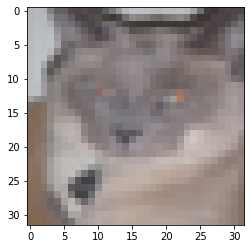

In [10]:
png_filenames = glob.glob(os.path.join(png_path, '*.png'))
img = Image.open(png_filenames[0])
plt.imshow(img)

Check that we can read the labels from the pkl. 0 = airplane, 1 = automobile, 2 = bird, 3 = cat, 4 = deer, 5 = dog, 6 = frog, 7 = horse, 8 = ship, 9 = truck

In [11]:
with open(label_filename, 'rb') as fo:
    label_dict = pickle.load(fo, encoding='bytes')

label_dict[os.path.basename(png_filenames[0])]

3

In [12]:
len(label_dict)

50000